In [198]:
import numpy as np
from sklearn import tree
import time
import pandas as pd
import datetime

In [199]:
df=pd.read_csv("FullDataSet/training_data.csv")
df.head()

,id,ad,link,timestamp,checkout,order_placed,grp,funnel_level
0,session446676598812,ad412316860435,link1288490188810,2018-04-30T14:39:22.000-04:00,1,1,grp936302870529,lower
1,session60129542152,ad584115552306,link1288490188810,2018-04-30T08:39:23.000-04:00,1,1,grp936302870529,lower
2,session1511828488251,ad1056561954841,link1288490188810,2018-04-30T17:24:01.000-04:00,1,1,grp936302870529,lower
3,session1142461300754,ad1666447310876,link1288490188810,2018-04-30T10:42:57.000-04:00,1,1,grp936302870529,lower
4,session1142461300754,ad1666447310876,link1288490188810,2018-04-30T10:43:19.000-04:00,1,1,grp936302870529,lower


In [200]:
df['timestamp']=df.timestamp.str.split('T').str[-1].str.split(':').str[0]
df.head()

,id,ad,link,timestamp,checkout,order_placed,grp,funnel_level
0,session446676598812,ad412316860435,link1288490188810,14,1,1,grp936302870529,lower
1,session60129542152,ad584115552306,link1288490188810,08,1,1,grp936302870529,lower
2,session1511828488251,ad1056561954841,link1288490188810,17,1,1,grp936302870529,lower
3,session1142461300754,ad1666447310876,link1288490188810,10,1,1,grp936302870529,lower
4,session1142461300754,ad1666447310876,link1288490188810,10,1,1,grp936302870529,lower


In [201]:
test=pd.read_csv("./FullDataSet/test_data .csv")
test['timestamp']=test.timestamp.str.split('T').str[-1].str.split(':').str[0]
test.head()

,id,ad,link,timestamp,grp,funnel_level
0,session240518168612,ad678604832787,link1288490188810,16,grp936302870529,lower
1,session876173328405,ad1451698946059,link1288490188810,12,grp936302870529,lower
2,session1382979469382,ad1468878815242,link1288490188810,20,grp936302870529,lower
3,session927712936010,ad64,link1288490188800,21,grp111669149696,lower
4,session970662608923,ad17179869199,link1288490188800,15,grp111669149696,lower


In [202]:
Y=df[['checkout','order_placed']]
X=df.drop(columns=['checkout','order_placed','id'])
test_change=test.drop(columns=['id'])

In [203]:
test_change.shape,X.shape

((49414, 5), (199410, 5))

In [204]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
appended=X.append(test_change)

for column_name in X.columns:
    le.fit(appended[column_name].astype(str))  
    X[column_name]=le.transform(X[column_name].astype(str))
    test_change[column_name]=le.transform(test_change[column_name].astype(str))
X.head(),test.head(),test_change.head()

(     ad  link  timestamp  grp  funnel_level
 0  7834  1048         14  101             0
 1  9223  1048          8  101             0
 2   496  1048         17  101             0
 3  5384  1048         10  101             0
 4  5384  1048         10  101             0,
                      id               ad               link timestamp  \
 0   session240518168612   ad678604832787  link1288490188810        16   
 1   session876173328405  ad1451698946059  link1288490188810        12   
 2  session1382979469382  ad1468878815242  link1288490188810        20   
 3   session927712936010             ad64  link1288490188800        21   
 4   session970662608923    ad17179869199  link1288490188800        15   
 
                grp funnel_level  
 0  grp936302870529        lower  
 1  grp936302870529        lower  
 2  grp936302870529        lower  
 3  grp111669149696        lower  
 4  grp111669149696        lower  ,
      ad  link  timestamp  grp  funnel_level
 0  9974  1048         16  

## order places in particualr hours

C:\Users\Aanchal\Anaconda3\envs\tensorflow-gpu\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


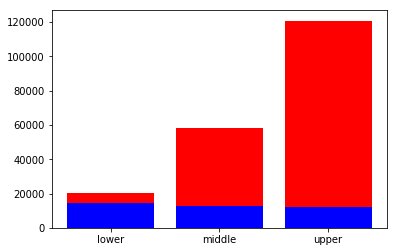

In [205]:
import matplotlib.pyplot as plt
fig=plt.figure()
ax=fig.add_subplot(111)


order_count = {}
for x in df.funnel_level.unique():
    order_count[x]=df[df.funnel_level==x]['order_placed'].sum()
order_count=sorted(order_count.items())
x,y=zip(*order_count)
ax.bar(x,y,color='blue')

order_count0 = {}
for x in df.funnel_level.unique():
    order_count0[x]=df[df.funnel_level==x][df['order_placed']==0]['id'].count()
order_count0=sorted(order_count0.items())

x0,y0=zip(*order_count0)
ax.bar(x0,y0,bottom=y,color='red')

       
       
plt.show()

In [206]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X,Y)

In [207]:
clf.predict(X)

array([[1., 1.],
       [1., 1.],
       [1., 1.],
       ...,
       [1., 0.],
       [0., 0.],
       [0., 0.]])

In [208]:
clf.score(X,Y)

0.9050699563712953

In [209]:
rslt=clf.predict(test_change)

In [210]:
test.size
test.head()

,id,ad,link,timestamp,grp,funnel_level
0,session240518168612,ad678604832787,link1288490188810,16,grp936302870529,lower
1,session876173328405,ad1451698946059,link1288490188810,12,grp936302870529,lower
2,session1382979469382,ad1468878815242,link1288490188810,20,grp936302870529,lower
3,session927712936010,ad64,link1288490188800,21,grp111669149696,lower
4,session970662608923,ad17179869199,link1288490188800,15,grp111669149696,lower


In [211]:
result=pd.DataFrame({'id': test.id,'order_placed': rslt[:,1].astype(int)})#,columns=["id","order_placed"])

result.head()

,id,order_placed
0,session240518168612,1
1,session876173328405,1
2,session1382979469382,0
3,session927712936010,1
4,session970662608923,1


In [212]:
result=result.set_index('id')
result.to_csv("ans.csv")

In [214]:
result.head()

,order_placed
id,
session240518168612,1
session876173328405,1
session1382979469382,0
session927712936010,1
session970662608923,1
